In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 14.8 MB/s eta 0:00:0000:01


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random

In [4]:
model = YOLO('yolov8n.pt')  

100%|██████████| 6.25M/6.25M [00:00<00:00, 82.1MB/s]


In [5]:
images_dir = Path(r"/kaggle/input/coco-2017-dataset/coco2017/train2017")
image_files = list(images_dir.glob('*.jpg'))
random_image_path = random.choice(image_files)

In [6]:
img = cv2.imread(str(random_image_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
results = model(img_rgb)

for result in results:
    result.plot()  


0: 640x448 2 persons, 1 cake, 1 dining table, 1 tv, 1 book, 250.0ms
Speed: 8.1ms preprocess, 250.0ms inference, 21.4ms postprocess per image at shape (1, 3, 640, 448)


In [8]:
labels = model.names
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get the bounding boxes
    
    class_ids = result.boxes.cls.cpu().numpy()  # Get the class IDs
   
    confidences = result.boxes.conf.cpu().numpy()  # Get the confidence scores
    
    print("Boxes:", boxes)
    print("Class IDs:", class_ids)
    print("Confidences:", confidences)


Boxes: [[     136.27      86.952      282.31      465.11]
 [     265.84      5.5728      425.69      525.75]
 [     16.963      352.03      152.82      548.98]
 [          0      396.72      381.49      639.36]
 [     321.57      438.08      425.34      639.88]
 [      201.7      432.84      297.33      582.09]]
Class IDs: [          0           0          55          60          62          73]
Confidences: [    0.88261     0.86196      0.7533     0.61612      0.5167     0.27854]


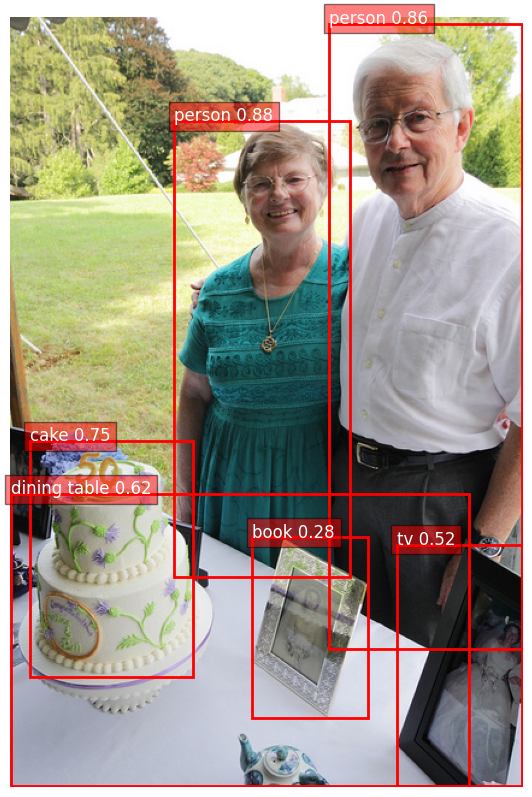

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box[:4])
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
    plt.text(x1, y1, f'{labels[int(class_ids[i])]} {confidences[i]:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.show()

In [10]:
test_images_dir = Path(r"/kaggle/input/coco-2017-dataset/coco2017/test2017")
test_image_files = list(test_images_dir.glob('*.jpg'))
random_test_image_path = random.choice(test_image_files)
testimg = cv2.imread(str(random_test_image_path))
test_img_rgb = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
testresults = model(test_img_rgb)

for testresult in testresults:
    result.plot() 


0: 448x640 2 persons, 2 bicycles, 138.9ms
Speed: 11.1ms preprocess, 138.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [11]:
for testresult in testresults:
    testboxes = testresult.boxes.xyxy.cpu().numpy()  # Get the bounding boxes
    
    test_class_ids = testresult.boxes.cls.cpu().numpy()  # Get the class IDs
    
    test_confidences = testresult.boxes.conf.cpu().numpy()  # Get the confidence scores
    
    print("Boxes:", testboxes)
    print("Class IDs:", test_class_ids)
    print("Confidences:", test_confidences)


Boxes: [[     109.13      238.64      285.48       424.4]
 [     374.96      121.06      497.89      406.18]
 [     135.55      119.02      289.83      421.48]
 [     341.87      237.72      454.98      415.08]]
Class IDs: [          1           0           0           1]
Confidences: [    0.94076      0.8741     0.86644     0.81611]


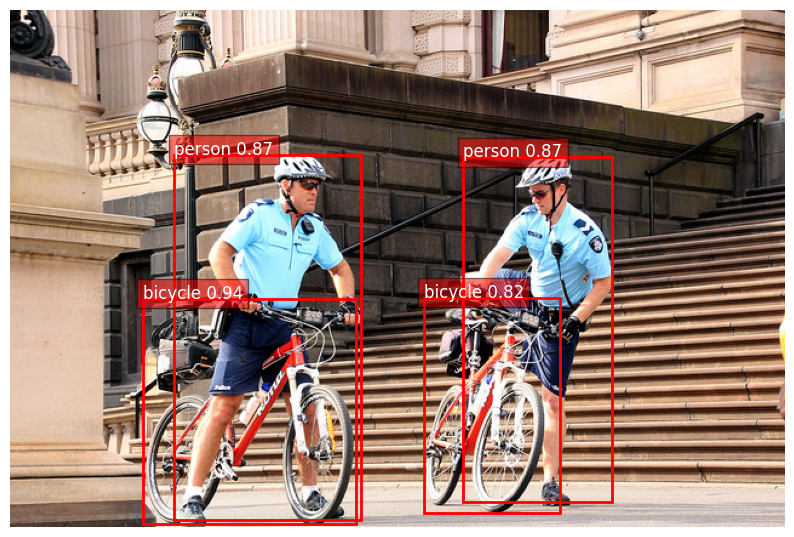

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(test_img_rgb)
for i, testbox in enumerate(testboxes):
    x1, y1, x2, y2 = map(int, testbox[:4])
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
    plt.text(x1, y1, f'{labels[int(test_class_ids[i])]} {test_confidences[i]:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.show()